In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import PIL.Image as Image
import os
from MyDataset import TGS_Dataset
import cv2
print('finish')

finish


In [2]:
# fetch out first 100 pictures in testing set
TEST_PATH = './Data/test'
test_dataset = TGS_Dataset(TEST_PATH)
dff = test_dataset.create_dataset_df(TEST_PATH)
print('size of testing images:', dff.shape[0])
test_image = []
for i in range(100):
    test_image.append(cv2.imread(dff.img_path[i]))
# fetch out predict csv file results
df = pd.read_csv('./Saves/Res34Unetv4_two_rounds_training/Res34Unetv4_5foldAvg.csv')
print('size of result mask:', df.shape[0])

size of testing images: 18000
size of result mask: 18000


In [3]:
# write a function to decode the rle file into a mask picture
def do_length_decode(rle, H, W, fill_value=255):
    mask = np.zeros((H, W), np.uint8)
    if rle == '' or rle == 'nan':
        return mask
    else:
        mask = mask.reshape(-1)
        rle = np.array([int(s) for s in rle.split(' ')]).reshape(-1, 2)
        for r in rle:
            start = r[0] - 1
            end = start + r[1]
            mask[start:end] = fill_value
        
        mask = mask.reshape(W, H).T
        return mask

In [4]:
IMAGE_COLUMN = 12
IMAGE_ROW = 6
IMAGE_SIZE = 101
to_mask = np.zeros((IMAGE_ROW * IMAGE_SIZE, IMAGE_COLUMN * IMAGE_SIZE), np.uint8)
to_image = Image.new('RGB', (IMAGE_COLUMN * IMAGE_SIZE, IMAGE_ROW * IMAGE_SIZE))
to_image = np.array(to_image)
to_mask = np.array(to_mask)

# respectively put the first 6*12 testing pictures and corresponding predict mask information to a big picture
for i in range(6):
    for j in range(12):
        to_image[i*101:(i+1)*101, j*101:(j+1)*101, :] = test_image[12*i+j]
        to_mask[i*101:(i+1)*101, j*101:(j+1)*101] = do_length_decode('{}'.format(df.rle_mask.iloc[12*i+j]), 101, 101)
print(to_image.shape)
print(to_mask.shape)

(606, 1212, 3)
(606, 1212)


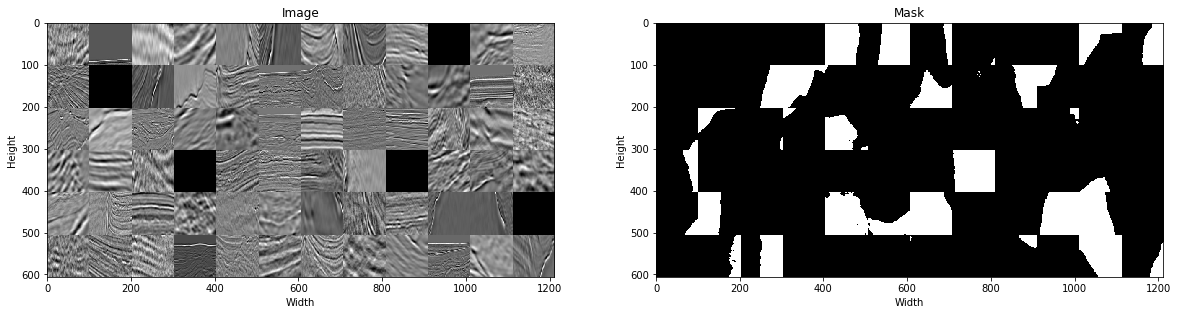

In [5]:
# display the big picture and mask information out
f, ax = plt.subplots(1, 2, figsize=(20, 20))
ax[0].set_title('Image')
ax[0].set_xlabel('Width')
ax[0].set_ylabel('Height')
ax[1].set_title('Mask')
ax[1].set_xlabel('Width')
ax[1].set_ylabel('Height')
ax[0].imshow(to_image)
ax[1].imshow(to_mask, cmap='gray')